In [2]:
from tensorflow import keras
from sklearn.metrics import roc_curve, roc_auc_score
from keras.preprocessing import image
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

model = keras.models.load_model("mydata/savedmodelformydata(60epochs)")


In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      25632     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 64, 64, 32)       

In [5]:
import os 
main_dir = os.getcwd()+'\mydata'
train_dir = os.path.join(main_dir+'\\train')
test_dir = os.path.join(main_dir+'\\test')

test_covid_dir = os.path.join(test_dir+'\\COVID')
test_normal_dir = os.path.join(test_dir+'\\NORMAL')
train_covid_dir = os.path.join(train_dir+'\\COVID')
train_normal_dir = os.path.join(train_dir+'\\NORMAL')


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

dgen_validation = ImageDataGenerator(rescale = 1./255)

dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                target_size = (256,256),
                                                subset = 'training',
                                                batch_size = 32,
                                                class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                target_size = (256,256),
                                                subset = 'validation',
                                                batch_size = 32,
                                                class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                target_size = (256,256),
                                                batch_size = 32,
                                                class_mode = 'binary')


Found 4276 images belonging to 2 classes.
Found 1068 images belonging to 2 classes.
Found 439 images belonging to 2 classes.


In [16]:
print(len(test_generator.classes))

439


In [27]:
y_pred=[]
import numpy as np
for i in range(len(os.listdir(test_covid_dir))):
    img_path = test_covid_dir+f'\\{os.listdir(test_covid_dir)[i]}'
    img = image.load_img(img_path,target_size=(256,256))
    images = image.img_to_array(img) 
    images = np.expand_dims(images,axis=0)
    prediction = model.predict(images)
    if(prediction[0][0]>=1):
        covid=1
    else:
        covid=0
    y_pred.append(covid)


for i in range(len(os.listdir(test_normal_dir))):
    img_path = test_normal_dir+f'\\{os.listdir(test_normal_dir)[i]}'
    img = image.load_img(img_path,target_size=(256,256))
    images = image.img_to_array(img) 
    images = np.expand_dims(images,axis=0)
    prediction = model.predict(images)
    if(prediction[0][0]>0):
        normal=1
    else:
        normal=0
    y_pred.append(normal)

print(len(y_pred))

440


In [28]:
import numpy as np
y_pred= y_pred[:len(y_pred)-1]
print(len(y_pred))
y_pred= np.array(y_pred)

439


In [29]:
 from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(test_generator.classes, y_pred)

In [30]:
print('roc_auc_score: ', roc_auc_score(test_generator.classes, y_pred))
    

roc_auc_score:  0.939135489325724


In [22]:
from confusion_viz import ConfusionViz

conf_viz = ConfusionViz()
conf_viz.fit(test_generator.classes, y_pred)
conf_viz.show()

AssertionError: y_true and probas_pred must have same length

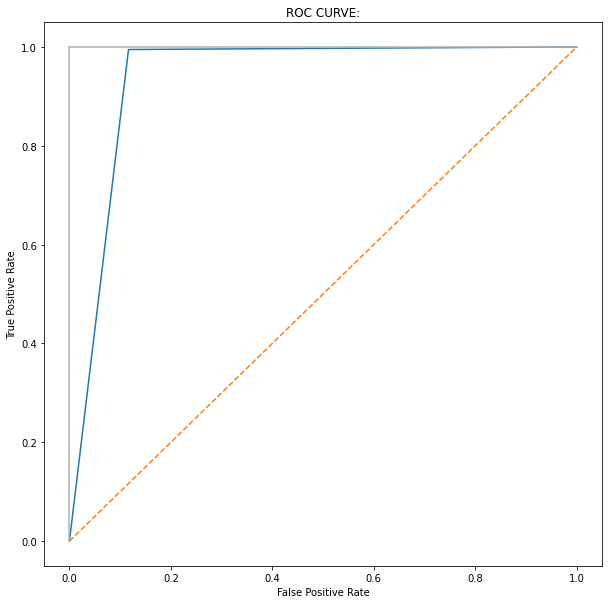

In [17]:
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('ROC CURVE:')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

TOTAL TESTING COVID IMAGES:250
TOTAL TESTING NORMAL IMAGES: 190


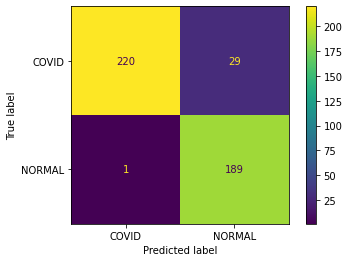




Accuracy: 93.16628701594533 %



CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

       COVID       1.00      0.88      0.94       249
      NORMAL       0.87      0.99      0.93       190

    accuracy                           0.93       439
   macro avg       0.93      0.94      0.93       439
weighted avg       0.94      0.93      0.93       439



In [21]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(f"TOTAL TESTING COVID IMAGES:{len(os.listdir(test_covid_dir))}")
print(f"TOTAL TESTING NORMAL IMAGES: {len(os.listdir(test_normal_dir))}")
cm= confusion_matrix(test_generator.classes, y_pred)

labels=['COVID','NORMAL']
cm=confusion_matrix(test_generator.classes,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                        display_labels=labels)
disp.plot()
plt.show()

TN= cm[0][0]
FP= cm[0][1]
FN=cm[1][0]
TP= cm[1][1]

accuracy=(TP+TN)/(TN+TP+FN+FP)
print("\n\n")
print(f"Accuracy: {accuracy*100} %" ) 
print("\n\n")
print("CLASSIFICATION REPORT: \n")
print(classification_report(test_generator.classes, y_pred, target_names=labels))

In [12]:

w = widgets.IntSlider()
uploader = widgets.FileUpload()
display(uploader)


FileUpload(value={}, description='Upload')

In [13]:
list(uploader.value.values())[0]['metadata']['name']
filename= list(uploader.value.values())[0]['metadata']['name']
img_path = test_normal_dir+f'\\{filename}'

img = image.load_img(img_path,target_size=(150,150))
images = image.img_to_array(img) 
images = np.expand_dims(images,axis=0)
# print(images)

Your report is normal


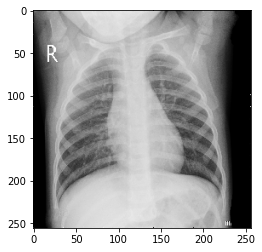

In [14]:
list(uploader.value.values())[0]['metadata']['name']
filename= list(uploader.value.values())[0]['metadata']['name']
img_path = test_normal_dir+f'\\{filename}'

img = image.load_img(img_path,target_size=(256,256))
images = image.img_to_array(img) 
images = np.expand_dims(images,axis=0)

prediction = model.predict(images)
if prediction == 0:
    plt.imshow(img,cmap="gray")
    print('covid detected') 
else: 
    plt.imshow(img,cmap="gray")
    print('Your report is normal') 